In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency

# Load the data file
data = pd.read_csv("data/healthcare-dataset-stroke-data.csv")

# Show first 4 transponded rows
print("Data head transponed:")
print(data.head(4).T)

Data head transponed:
                                 0              1             2        3
id                            9046          51676         31112    60182
gender                        Male         Female          Male   Female
age                           67.0           61.0          80.0     49.0
hypertension                     0              0             0        0
heart_disease                    1              0             1        0
ever_married                   Yes            Yes           Yes      Yes
work_type                  Private  Self-employed       Private  Private
Residence_type               Urban          Rural         Rural    Urban
avg_glucose_level           228.69         202.21        105.92   171.23
bmi                           36.6            NaN          32.5     34.4
smoking_status     formerly smoked   never smoked  never smoked   smokes
stroke                           1              1             1        1


In [2]:
# Basic info
print("Basic info:")
print(f"{data.info()}\n")

# Show missing
print("Missing values:")
print(f"{data.isnull().sum()}\n")

Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None

Missing values:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          

In [3]:
# Fill the BMI with its median
data["bmi"] = data["bmi"].fillna(data["bmi"].median())

print("Missing values:", data.isnull().sum().sum())

Missing values: 0


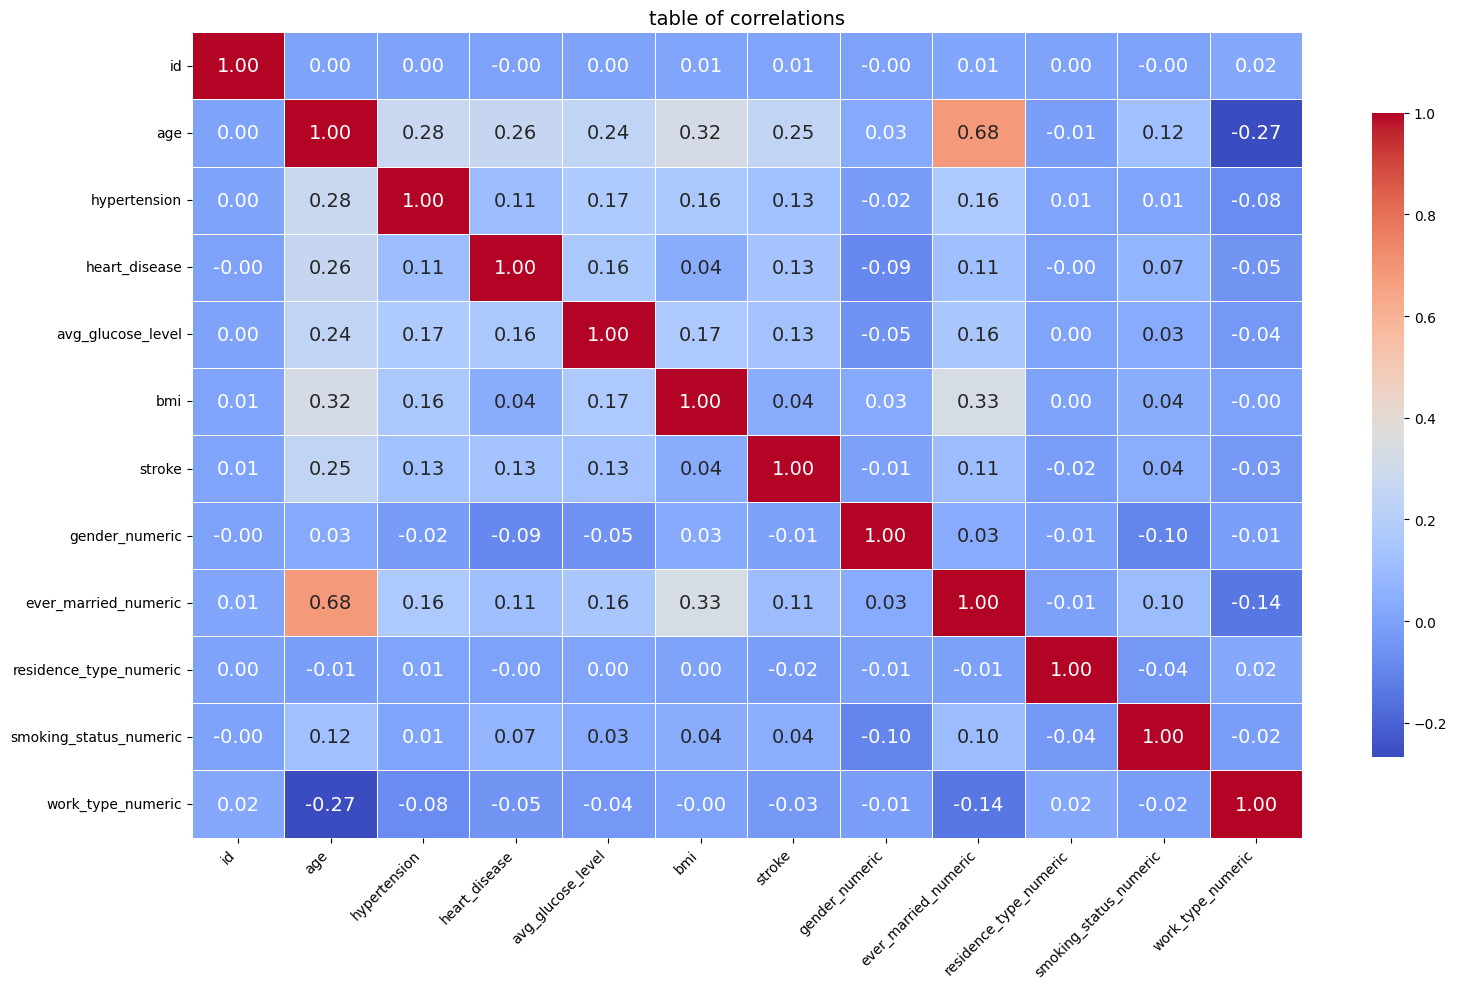

In [4]:
# Conversion to numeric values
data["gender_numeric"] = data["gender"].map({"Male": 0, "Female": 1})
data["ever_married_numeric"] = data["ever_married"].map({"No": 0, "Yes": 1})
data["residence_type_numeric"] = data["Residence_type"].map({"Urban": 0, "Rural": 1})
data["smoking_status_numeric"] = data["smoking_status"].map({"never smoked": 0, "smokes": 1, "formerly smoked": 1})
data['work_type_numeric'] = data['work_type'].map({'Private': 1,'Self-employed': 0,'Govt_job': 0})

# Numeric data only
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(numeric_data.corr(), 
            annot=True, 
            cmap="coolwarm", 
            fmt=".2f",
            annot_kws={"size": 14},
            linewidths=0.5,
            cbar_kws={"shrink": 0.8}
           )

plt.title("table of correlations", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("Images/correlation_map.png", dpi=300, bbox_inches="tight")
plt.show()

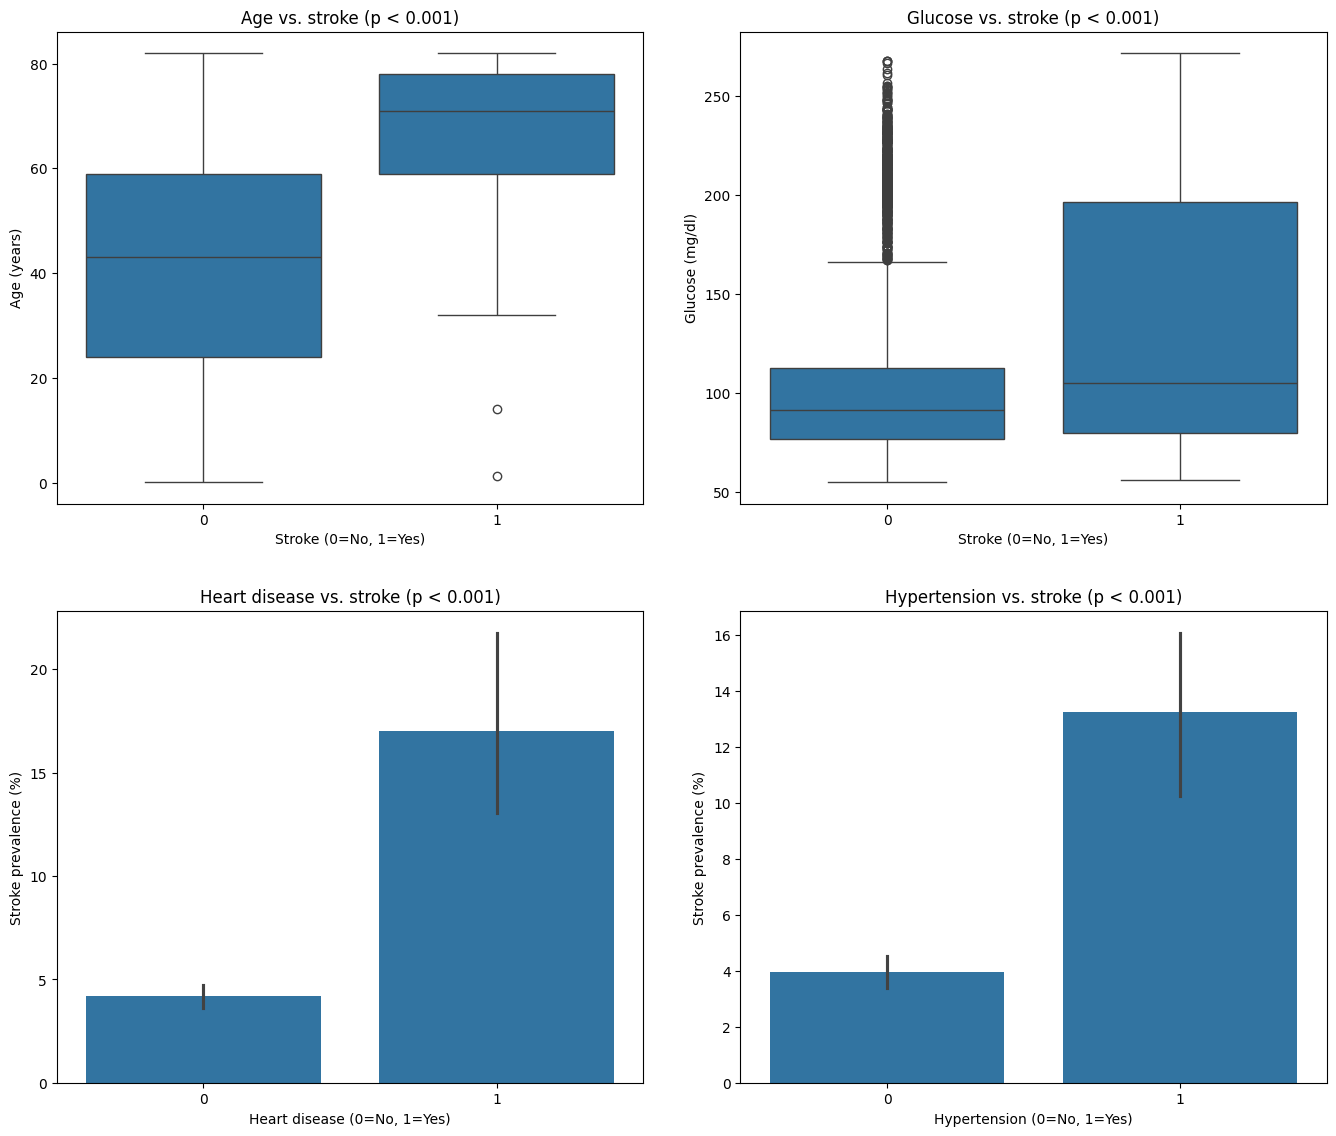

In [5]:
# Figure for each significant value
plt.figure(figsize=(14, 12))

# Chart 1: Age vs. stroke
plt.subplot(2, 2, 1)
sns.boxplot(x="stroke", y="age", data=data)
age_stroke = data[data["stroke"] == 1]["age"]
age_no_stroke = data[data["stroke"] == 0]["age"]
t_stat, p_age = ttest_ind(age_stroke, age_no_stroke)
p_age_text = f"p = {p_age:.3f}" if p_age >= 0.001 else "p < 0.001"
plt.title(f"Age vs. stroke ({p_age_text})", fontsize=12)
plt.xlabel("Stroke (0=No, 1=Yes)", fontsize=10)
plt.ylabel("Age (years)", fontsize=10)

# Chart 2: Average glucose vs. stroke
plt.subplot(2, 2, 2)
sns.boxplot(x="stroke", y="avg_glucose_level", data=data)
glucose_stroke = data[data["stroke"] == 1]["avg_glucose_level"]
glucose_no_stroke = data[data["stroke"] == 0]["avg_glucose_level"]
t_stat, p_glucose = ttest_ind(glucose_stroke, glucose_no_stroke)
p_glucose_text = f"p = {p_glucose:.3f}" if p_glucose >= 0.001 else "p < 0.001"
plt.title(f"Glucose vs. stroke ({p_glucose_text})", fontsize=12)
plt.xlabel("Stroke (0=No, 1=Yes)", fontsize=10)
plt.ylabel("Glucose (mg/dl)", fontsize=10)

# Chart 3: Heart disease vs. stroke
plt.subplot(2, 2, 3)
sns.barplot(x="heart_disease", y="stroke", data=data, estimator=lambda x: sum(x)/len(x)*100)
contingency_heart = pd.crosstab(data["heart_disease"], data["stroke"])
chi2, p_heart, _, _ = chi2_contingency(contingency_heart)
p_heart_text = f"p = {p_heart:.3f}" if p_heart >= 0.001 else "p < 0.001"
plt.title(f"Heart disease vs. stroke ({p_heart_text})", fontsize=12)
plt.xlabel("Heart disease (0=No, 1=Yes)", fontsize=10)
plt.ylabel("Stroke prevalence (%)", fontsize=10)

# Chart 4: Hypertension vs. stroke
plt.subplot(2, 2, 4)
sns.barplot(x="hypertension", y="stroke", data=data, estimator=lambda x: sum(x)/len(x)*100)
contingency_hyper = pd.crosstab(data["hypertension"], data["stroke"])
chi2, p_hyper, _, _ = chi2_contingency(contingency_hyper)
p_hyper_text = f"p = {p_hyper:.3f}" if p_hyper >= 0.001 else "p < 0.001"
plt.title(f"Hypertension vs. stroke ({p_hyper_text})", fontsize=12)
plt.xlabel("Hypertension (0=No, 1=Yes)", fontsize=10)
plt.ylabel("Stroke prevalence (%)", fontsize=10)

plt.tight_layout(pad=3.0)
plt.savefig("Images/all_four_graphs.png", dpi=300, bbox_inches="tight")
plt.show()

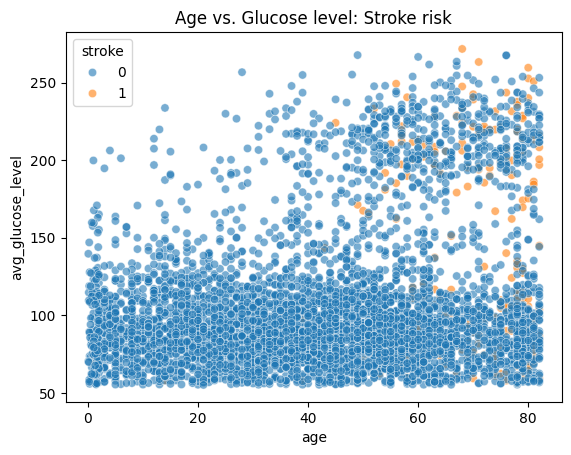

In [6]:
# Age vs. Glucose level: Stroke risk scatterplot
sns.scatterplot(x="age", y="avg_glucose_level", hue="stroke", data=data, alpha=0.6)
plt.title("Age vs. Glucose level: Stroke risk")
plt.savefig("Images/age_vs_glucose_vs_stroke.png", dpi=300, bbox_inches="tight")
plt.show()

C:\Users\m.filipek\AppData\Local\Temp\ipykernel_12464\3568679961.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


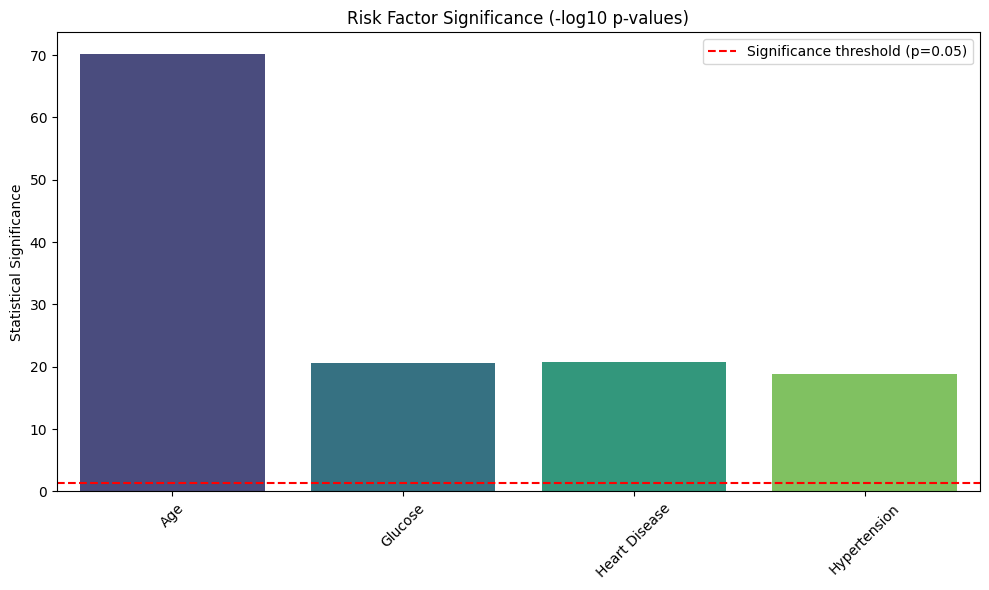

In [7]:
# Significance Visualization
plt.figure(figsize=(10, 6))
sns.barplot(
    x=["Age", "Glucose", "Heart Disease", "Hypertension"],
    y=[-np.log10(p_age), -np.log10(p_glucose), -np.log10(p_heart), -np.log10(p_hyper)], 
    palette="viridis"
)
plt.title("Risk Factor Significance (-log10 p-values)")
plt.ylabel("Statistical Significance")
plt.axhline(y=-np.log10(0.05), color='r', linestyle='--', label="Significance threshold (p=0.05)")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Images/risk_factor_significance.png", dpi=300)
plt.show()

In [8]:
# -------------------------------------------------------------------
# EXACT VALUES FOR PRESENTATION SLIDES
# -------------------------------------------------------------------

# Calculate exact medians and percentages
age_median_stroke = data[data["stroke"] == 1]["age"].median()
age_median_control = data[data["stroke"] == 0]["age"].median()
age_diff = ((age_median_stroke - age_median_control)/age_median_control)*100

glucose_median_stroke = data[data["stroke"] == 1]["avg_glucose_level"].median()
glucose_median_control = data[data["stroke"] == 0]["avg_glucose_level"].median()
glucose_diff = ((glucose_median_stroke - glucose_median_control)/glucose_median_control)*100

heart_rate_stroke = data[data["heart_disease"] == 1]["stroke"].mean()*100
heart_rate_control = data[data["heart_disease"] == 0]["stroke"].mean()*100

hyper_rate_stroke = data[data["hypertension"] == 1]["stroke"].mean()*100
hyper_rate_control = data[data["hypertension"] == 0]["stroke"].mean()*100

# Print formatted results
print("\n" + "="*50)
print("PRESENTATION SLIDE VALUES")
print("="*50)

print(f"""
1. AGE SLIDE:
   • Median (stroke): {age_median_stroke:.1f} years
   • Median (control): {age_median_control:.1f} years
   • Difference: +{age_diff:.0f}%
   • p-value: {p_age_text}""")

print(f"""
2. GLUCOSE SLIDE:
   • Median (stroke): {glucose_median_stroke:.1f} mg/dl
   • Median (control): {glucose_median_control:.1f} mg/dl
   • Difference: +{glucose_diff:.0f}%
   • p-value: {p_glucose_text}""")

print(f"""
3. HEART DISEASE SLIDE:
   • Stroke rate (with HD): {heart_rate_stroke:.1f}%
   • Stroke rate (no HD): {heart_rate_control:.1f}%
   • p-value: {p_heart_text}""")

print(f"""
4. HYPERTENSION SLIDE:
   • Stroke rate (with HTN): {hyper_rate_stroke:.1f}%
   • Stroke rate (no HTN): {hyper_rate_control:.1f}%
   • p-value: {p_hyper_text}""")
print("="*50 + "\n")


PRESENTATION SLIDE VALUES

1. AGE SLIDE:
   • Median (stroke): 71.0 years
   • Median (control): 43.0 years
   • Difference: +65%
   • p-value: p < 0.001

2. GLUCOSE SLIDE:
   • Median (stroke): 105.2 mg/dl
   • Median (control): 91.5 mg/dl
   • Difference: +15%
   • p-value: p < 0.001

3. HEART DISEASE SLIDE:
   • Stroke rate (with HD): 17.0%
   • Stroke rate (no HD): 4.2%
   • p-value: p < 0.001

4. HYPERTENSION SLIDE:
   • Stroke rate (with HTN): 13.3%
   • Stroke rate (no HTN): 4.0%
   • p-value: p < 0.001

